<a href="https://colab.research.google.com/github/IEEESBITBA/Curso-Python/blob/master/borrador_live_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ayuda 1: Ordenar dates:

In [0]:
from datetime import datetime 

datos = [
         (4, "2018-10-2"),
         (1, "2019-11-3"),
         (2, "2019-5-4")
]

datos.sort(key = lambda date: datetime.strptime(date[1], '%Y-%m-%d')) 

print(datos)


Ayuda 2: Como lograr que los ejes X de los gráficos sean iguales


In [0]:
!wget 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'

--2020-05-02 19:54:51--  https://covid.ourworldindata.org/data/ecdc/full_data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 138.68.244.143, 2604:a880:2:d0::1541:1001
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|138.68.244.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 450976 (440K) [text/csv]
Saving to: ‘full_data.csv’

full_data.csv       100%[===================>] 440.41K  2.83MB/s    in 0.2s    

2020-05-02 19:54:52 (2.83 MB/s) - ‘full_data.csv’ saved [450976/450976]



{'2020-03-04': 1, '2020-03-06': 2, '2020-03-07': 8, '2020-03-08': 9, '2020-03-09': 12, '2020-03-11': 19, '2020-03-13': 31, '2020-03-14': 34, '2020-03-15': 45, '2020-03-16': 56, '2020-03-17': 65, '2020-03-18': 79, '2020-03-19': 97, '2020-03-20': 128, '2020-03-21': 158, '2020-03-22': 225, '2020-03-23': 266, '2020-03-24': 301, '2020-03-25': 387, '2020-03-26': 502, '2020-03-27': 589, '2020-03-28': 690, '2020-03-29': 745, '2020-03-30': 820, '2020-03-31': 966, '2020-04-01': 966, '2020-04-02': 1133, '2020-04-03': 1133, '2020-04-04': 1265, '2020-04-05': 1451, '2020-04-06': 1554, '2020-04-07': 1628, '2020-04-08': 1715, '2020-04-09': 1795, '2020-04-10': 1894, '2020-04-11': 1975, '2020-04-12': 2137, '2020-04-13': 2203, '2020-04-14': 2272, '2020-04-15': 2432, '2020-04-16': 2432, '2020-04-17': 2560, '2020-04-18': 2658, '2020-04-19': 2828, '2020-04-20': 2930, '2020-04-21': 3020, '2020-04-22': 3132, '2020-04-23': 3276, '2020-04-24': 3423, '2020-04-25': 3423, '2020-04-26': 3767, '2020-04-27': 3767, '2

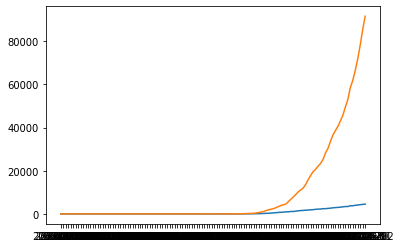

In [0]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime 

archivo = pd.read_csv('full_data.csv', header=0)
datos_records = archivo.to_dict('records')

argentina = []
brazil = []

for record in datos_records:
    if record['location'] == 'Argentina':
        argentina.append(record)
    elif record['location'] == 'Brazil':
        brazil.append(record)

arg = dict()

for caso in argentina:
    arg[caso['date']] = caso['total_cases'] # clave la fecha, contenido es la cantidad de casos

bra = dict()

for caso in brazil:
    bra[caso['date']] = caso['total_cases']

# casos de brazil y argentina
print(arg)

print(bra)

# tenemos que lograr que tengan los mismos dates

setDates = set()

for x in bra:
    setDates.add(x)

for x in arg:
    setDates.add(x)

listDates = list(setDates) # convertimos a list
listDates.sort(key = lambda date: datetime.strptime(date, '%Y-%m-%d')) 

yArg = []
yBra = []

last_arg = 0
last_bra = 0

for date in listDates:
    if date in arg:
        yArg.append(arg[date])
    else:
        yArg.append(last_arg) # si no esta agrego el ultimo encontrado
    
    if date in bra:
        yBra.append(bra[date])
    else:
        yBra.append(last_bra)
    
    # los ultimos son los valores que acabamos de agregar
    last_arg = yArg[-1]
    last_bra = yBra[-1]

plt.plot(listDates, yArg)
plt.plot(listDates, yBra)

Ayuda 2 versión Pato:

In [0]:
dateformat = '%Y-%m-%d'

alldates = [dt.datetime.strptime(x, dateformat) for x in DF['date']]

primerDia, ultimoDia = min(alldates), max(alldates)
print(primerDia,ultimoDia)

NroDias = (ultimoDia - primerDia).days
print(NroDias)

rangoDias = [primerDia + dt.timedelta(days=x) for x in range(NroDias)]
# print(rangoDias)DF['total_cases']

country = 'China'
total_cases = [0 for x in range(NroDias)]

for x in range(len(DF['total_cases'])):
    if DF['location'][x] == country:
        dia = dt.datetime.strptime(DF['date'][x],dateformat)
        indice = (dia-primerDia).days
        print(indice)
        casos = DF['total_cases'][x]
        total_cases[indice-1] = int(casos)

Ayuda 3: Lograr que el eje X se gráfique bien

https://bugsdb.com/_en/debug/0ceccc48c732adc466e2f9c9fa6044a3

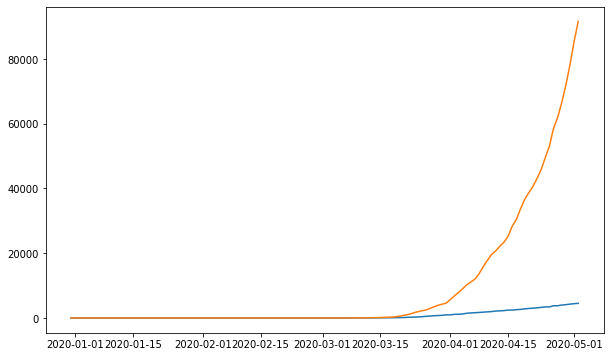

In [0]:
import matplotlib.dates as dates
import time
import pandas


def plotDates(x, y,subplots):
    fig, ax = subplots

    df = pandas.DataFrame(
        data=y, 
        index=pd.to_datetime(x),
        columns=['A']
    )

    formatter = dates.DateFormatter('%Y-%m-%d') 
    ax.xaxis.set_major_formatter(formatter)

    
    plt.plot(df.index, df['A'])

subplots = plt.subplots(figsize=(10, 6))

plotDates(listDates, yArg, subplots)
plotDates(listDates, yBra, subplots)

plt.show()
